<a href="https://colab.research.google.com/github/sabrinacheung06/Sleep-Disorder-Prediction/blob/main/sleep_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sleep Disorder Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Load Dataset
sleep = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
sleep.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


# Exploratory Data Analysis

In [9]:
#checking for missing values
sleep.isnull().sum()

# Only Sleep Disorder Column Has NA Values indicating person has no sleep disorder

,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


In [10]:
# Replace NAN values with None for consistentcy
sleep['Sleep Disorder'] = sleep['Sleep Disorder'].fillna('None')

In [11]:
print("Unique values in each column are:")
for col in sleep.columns:
    print(col,sleep[col].nunique())

Unique values in each column are:
Person ID 374
Gender 2
Age 31
Occupation 11
Sleep Duration 27
Quality of Sleep 6
Physical Activity Level 16
Stress Level 6
BMI Category 4
Blood Pressure 25
Heart Rate 19
Daily Steps 20
Sleep Disorder 3


In [12]:
#spliting the blood pressure into two columns
sleep['systolic_bp'] = sleep['Blood Pressure'].apply(lambda x: x.split('/')[0])
sleep['diastolic_bp'] = sleep['Blood Pressure'].apply(lambda x: x.split('/')[1])
#droping the blood pressure column
sleep.drop('Blood Pressure', axis=1, inplace=True)

In [13]:
#replacing normal weight with normal in BMI column
sleep['BMI Category'] = sleep['BMI Category'].replace('Normal Weight', 'Normal')

In [14]:
sleep.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,systolic_bp,diastolic_bp
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
2,3,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90


In [15]:
#Count of each unique value from categorical columns
for column in sleep.select_dtypes(include='object').columns:
    print(sleep[column].value_counts())
    print("\n")

Gender
Male      189
Female    185
Name: count, dtype: int64


Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: count, dtype: int64


BMI Category
Normal        216
Overweight    148
Obese          10
Name: count, dtype: int64


Sleep Disorder
None           219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64


systolic_bp
130    101
140     69
125     69
120     45
115     34
135     29
128      5
132      3
118      3
126      2
119      2
142      2
131      2
129      2
117      2
139      2
121      1
122      1
Name: count, dtype: int64


diastolic_bp
80    111
85    102
95     65
75     34
90     31
82      4
86      4
84      4
87      3
76      3
92      2
83      2
77      2
78      2
88      2
91   

# Visualizations

<Axes: xlabel='Sleep Disorder', ylabel='count'>

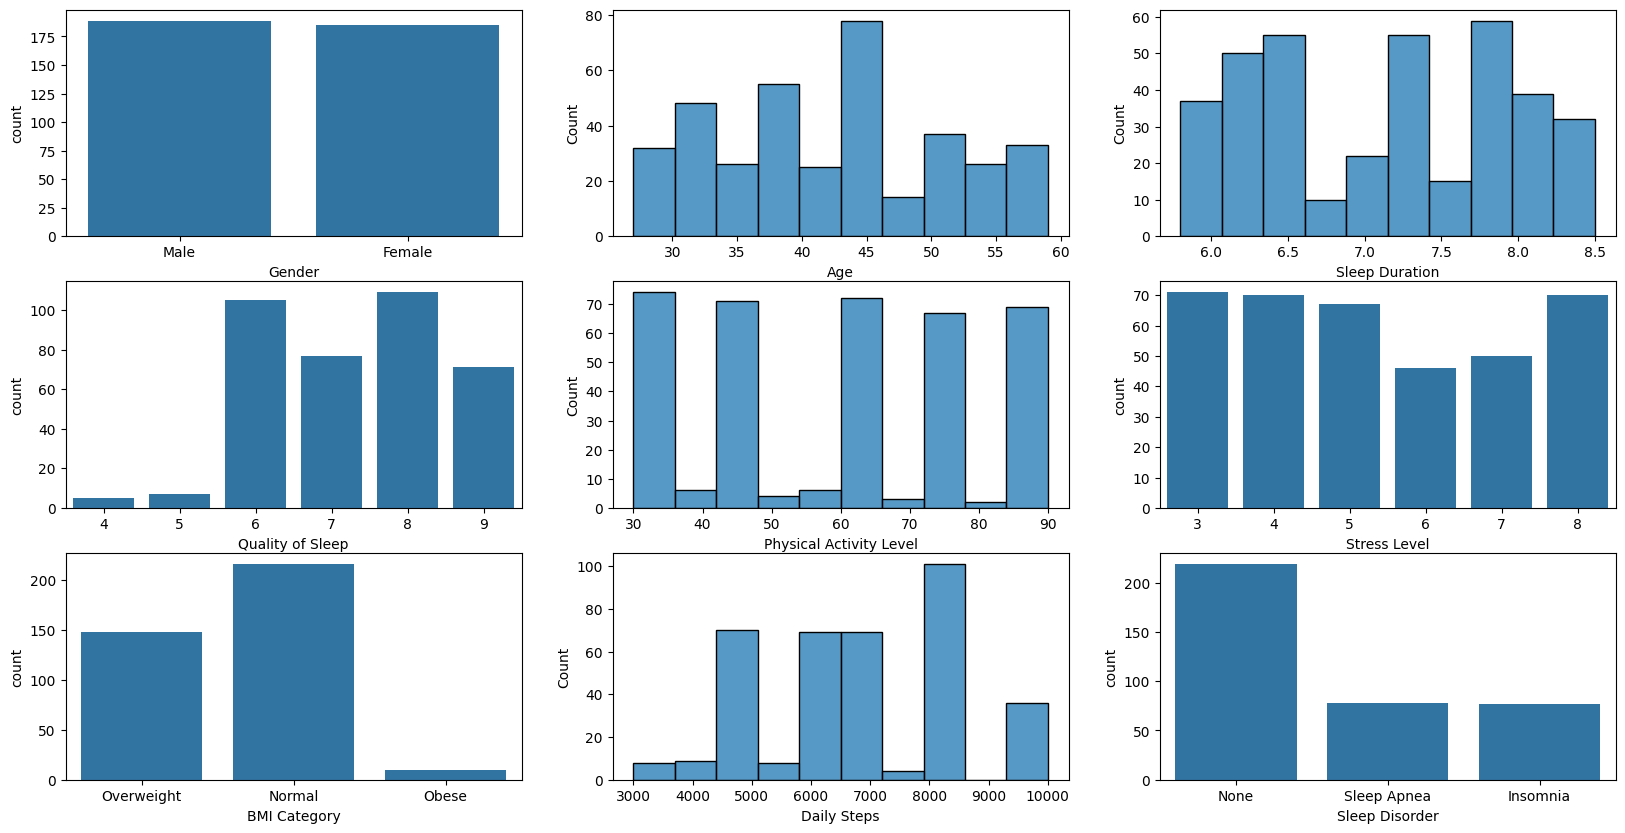

In [16]:
# Graphs of column counts
fig,ax = plt.subplots(3,3,figsize=(20,10))
sns.countplot(x = 'Gender', data = sleep, ax = ax[0,0])
sns.histplot(x = 'Age', data = sleep, ax = ax[0,1], bins = 10)
sns.histplot(x = 'Sleep Duration', data = sleep, ax = ax[0,2], bins = 10)
sns.countplot(x = 'Quality of Sleep', data = sleep, ax = ax[1,0])
sns.histplot(x = 'Physical Activity Level', data = sleep, ax = ax[1,1], bins = 10)
sns.countplot(x = 'Stress Level', data = sleep, ax = ax[1,2])
sns.countplot(x = 'BMI Category', data = sleep, ax = ax[2,0])
sns.histplot(x = 'Daily Steps', data = sleep, ax = ax[2,1], bins = 10)
sns.countplot(x = 'Sleep Disorder', data = sleep, ax = ax[2,2])

Text(0.5, 1.0, 'Gender and Sleep Disorder')

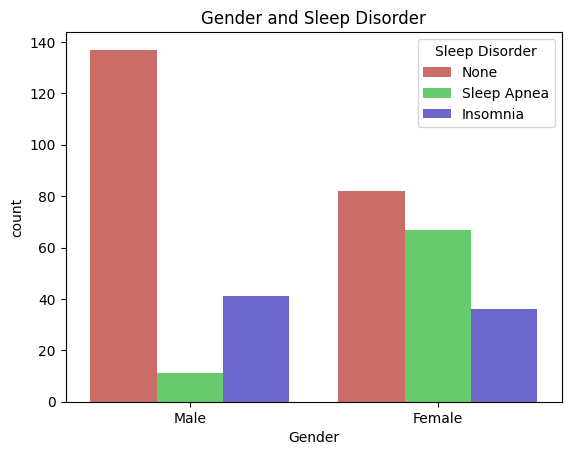

In [17]:
#Gender count plot
sns.countplot(x = 'Gender', data = sleep, palette = 'hls', hue = 'Sleep Disorder').set_title('Gender and Sleep Disorder')

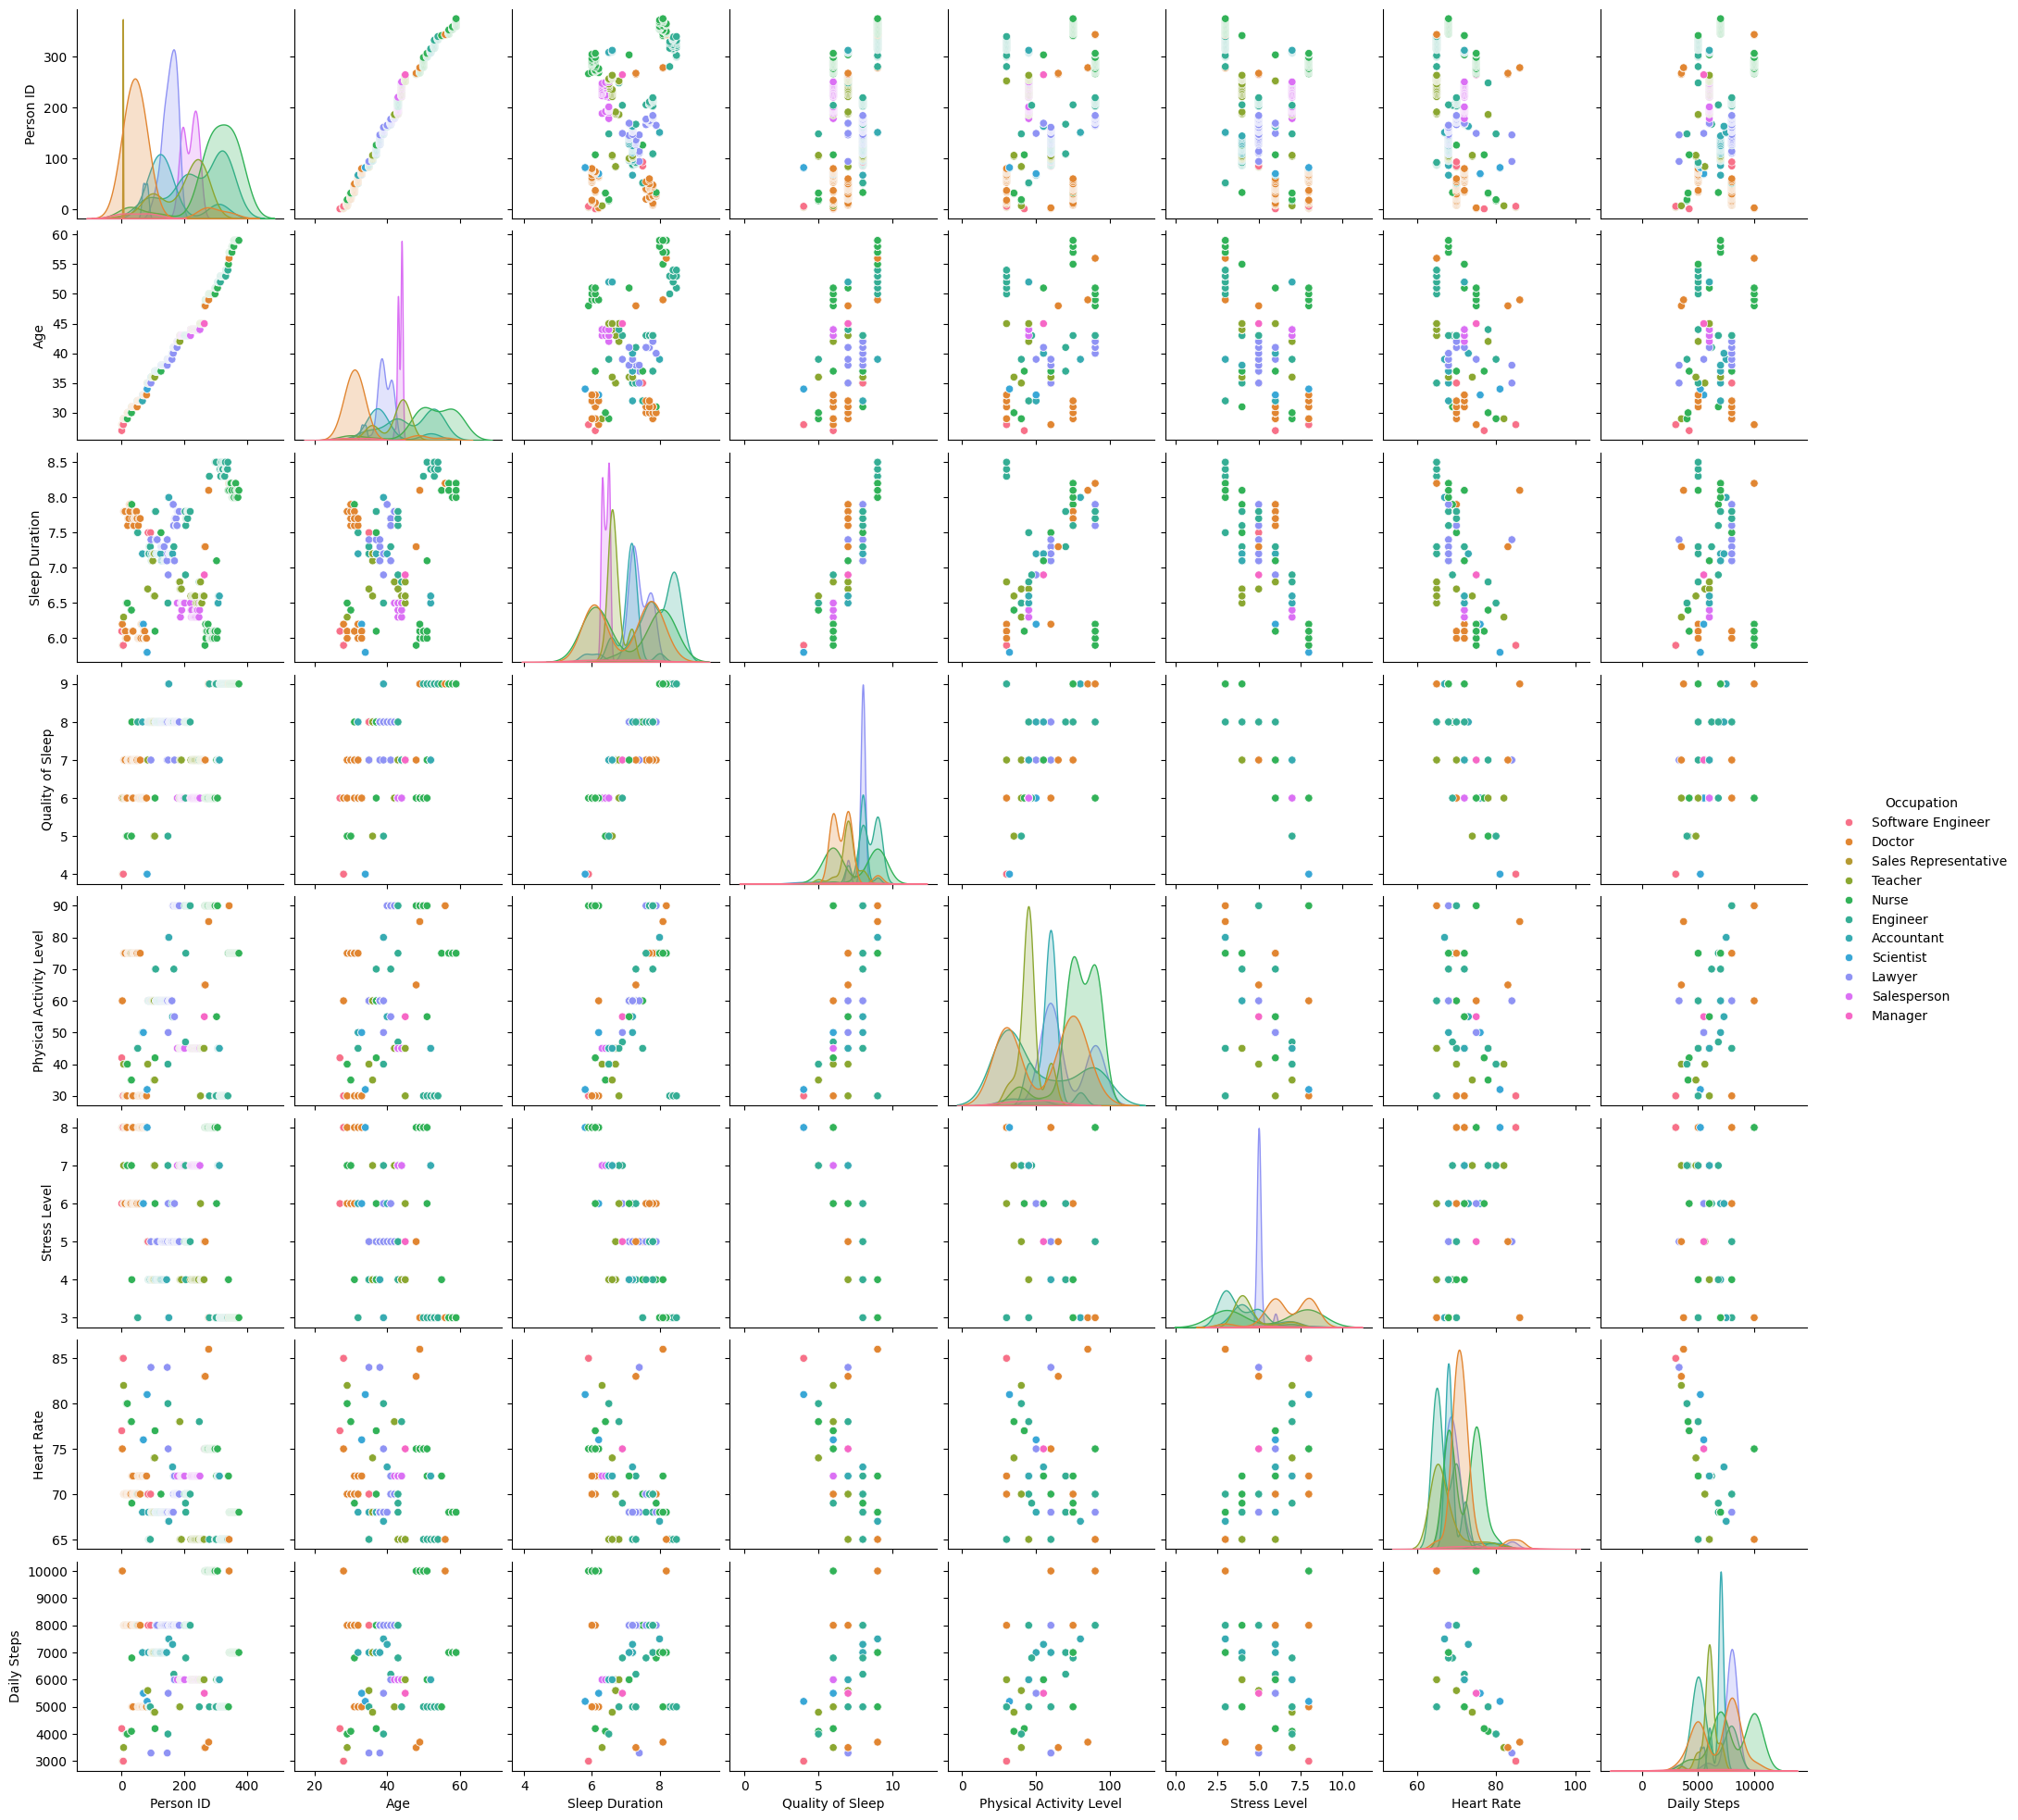

In [18]:
sns.pairplot(sleep, hue='Occupation')

# Data Preprocessing

In [19]:
# One hot encoding the categorical data into numerical for easier analysis
from sklearn.preprocessing import LabelEncoder

columns_to_encode = ['Gender', 'Occupation','BMI Category','Sleep Disorder']
label_encoder = LabelEncoder()

for column in columns_to_encode:
    # Perform the encoding
    sleep[column] = label_encoder.fit_transform(sleep[column])

    # Create a dictionary mapping original categories to encoded values
    encoding_map = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))

    print(f"{column} - Original and Encoded values:")
    for category, encoded_value in encoding_map.items():
        print(f"{category} -> {encoded_value}")

    print(f"Encoded data: {sleep[column].unique()}")
    print("\n")

for column in columns_to_encode:
    sleep[column] = label_encoder.fit_transform(sleep[column])
    print(column,"encoded values:", sleep[column].unique())

Gender - Original and Encoded values:
Female -> 0
Male -> 1
Encoded data: [1 0]


Occupation - Original and Encoded values:
Accountant -> 0
Doctor -> 1
Engineer -> 2
Lawyer -> 3
Manager -> 4
Nurse -> 5
Sales Representative -> 6
Salesperson -> 7
Scientist -> 8
Software Engineer -> 9
Teacher -> 10
Encoded data: [ 9  1  6 10  5  2  0  8  3  7  4]


BMI Category - Original and Encoded values:
Normal -> 0
Obese -> 1
Overweight -> 2
Encoded data: [2 0 1]


Sleep Disorder - Original and Encoded values:
Insomnia -> 0
None -> 1
Sleep Apnea -> 2
Encoded data: [1 2 0]


Gender encoded values: [1 0]
Occupation encoded values: [ 9  1  6 10  5  2  0  8  3  7  4]
BMI Category encoded values: [2 0 1]
Sleep Disorder encoded values: [1 2 0]


<Axes: >

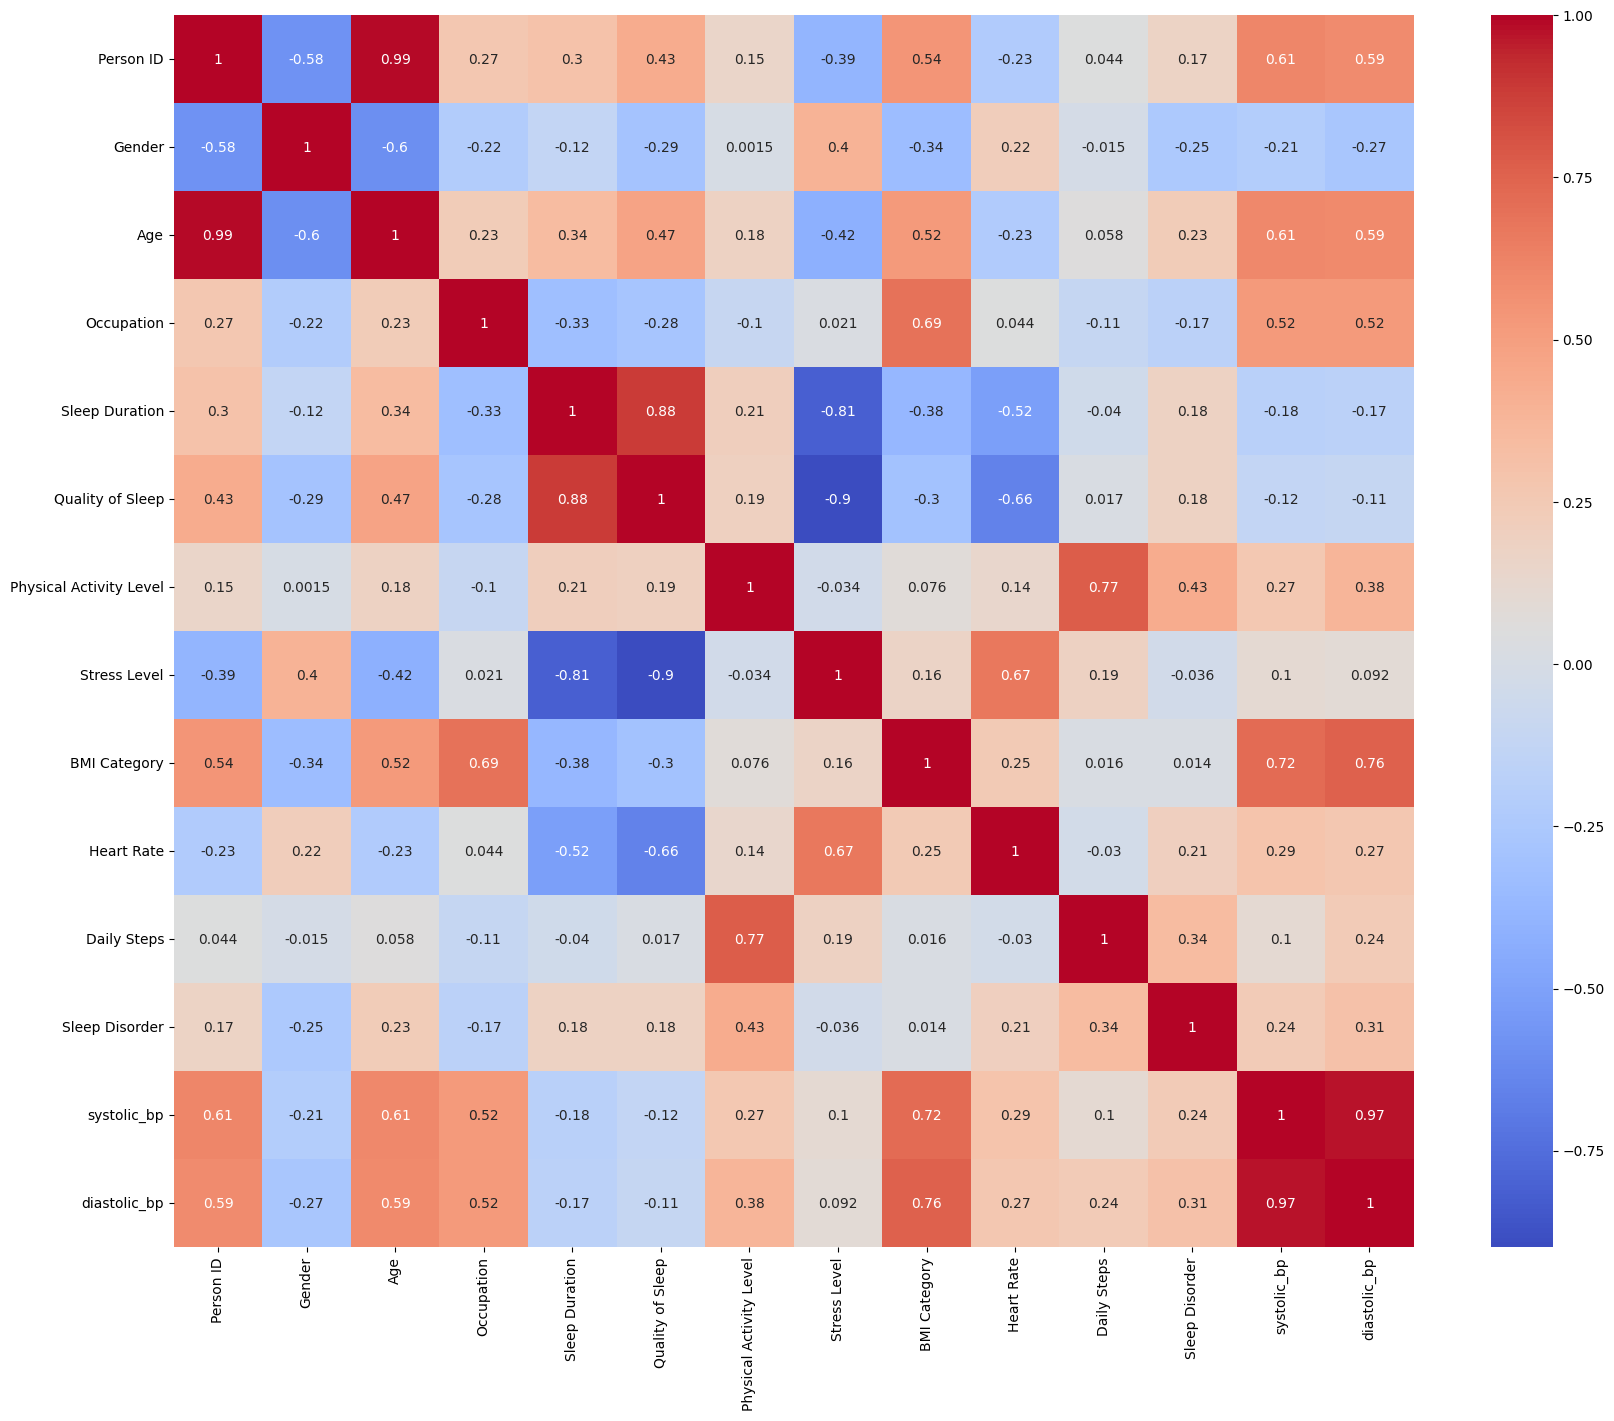

In [20]:
plt.figure(figsize=(20, 16))
sns.heatmap(sleep.corr(), annot = True, cmap = 'coolwarm')

In [21]:
# Split data into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(sleep.drop('Sleep Disorder', axis = 1), sleep['Sleep Disorder'], test_size = 0.25, random_state = 42)

# Model Training

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7659574468085106
Confusion Matrix:
 [[10  6  1]
 [ 9 46  0]
 [ 2  4 16]]
Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.59      0.53        17
           1       0.82      0.84      0.83        55
           2       0.94      0.73      0.82        22

    accuracy                           0.77        94
   macro avg       0.75      0.72      0.73        94
weighted avg       0.79      0.77      0.77        94



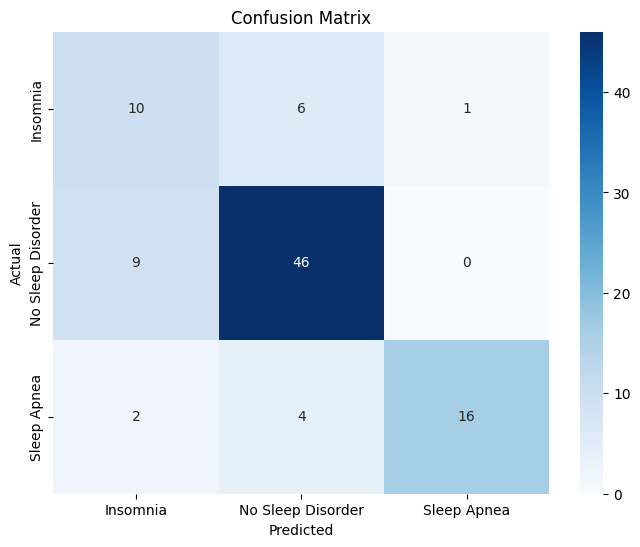

In [22]:
## Logistic Regression - Anna, Kaitlyn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g',
            xticklabels= ["Insomnia", "No Sleep Disorder", "Sleep Apnea"],
            yticklabels= ["Insomnia", "No Sleep Disorder", "Sleep Apnea"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Decision Tree Classifier
Accuracy: 0.9042553191489362



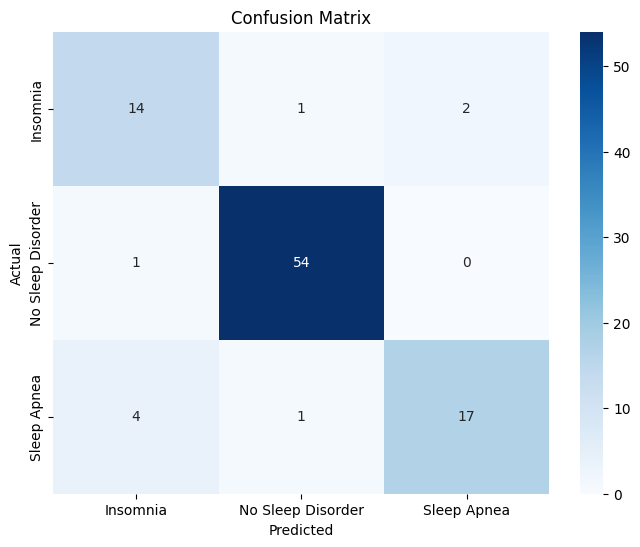

In [23]:
## Decision Tree Classifier - Maisie

# decision tree classifier to train model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import joblib

# create the decision tree
decision_tree_model = DecisionTreeClassifier(random_state = 42)

# train model
decision_tree_model.fit(X_train, y_train)

# making predictions on patterns learned
y_pred = decision_tree_model.predict(X_test)

# calculate accuracy (correctly predicted?)
accuracy = accuracy_score(y_test, y_pred)
print(f'Decision Tree Classifier\nAccuracy: {accuracy}\n')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g',
            xticklabels= ["Insomnia", "No Sleep Disorder", "Sleep Apnea"],
            yticklabels= ["Insomnia", "No Sleep Disorder", "Sleep Apnea"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Fitting 5 folds for each of 36 candidates, totalling 180 fits
{'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 2}
Test Accuracy: 0.9042553191489362


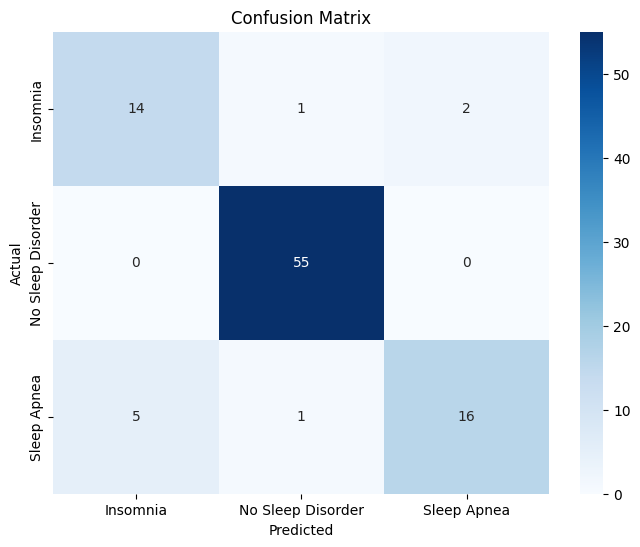

In [34]:
## Random Forest Classifier - Tess
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

random_forest_model = RandomForestClassifier(random_state = 2025)

parameter_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 5, 10]}

grid_search = GridSearchCV(random_forest_model, param_grid = parameter_grid, refit = True, verbose = 3, cv = 5, n_jobs = -1)

grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

import joblib
random_forest_model.fit(X_train, y_train)
y_pred = random_forest_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g',
            xticklabels= ["Insomnia", "No Sleep Disorder", "Sleep Apnea"],
            yticklabels= ["Insomnia", "No Sleep Disorder", "Sleep Apnea"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



Support Vector Machines

Accuracy: 79.79%

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.35      0.50        17
           1       0.75      1.00      0.86        55
           2       1.00      0.64      0.78        22

    accuracy                           0.80        94
   macro avg       0.87      0.66      0.71        94
weighted avg       0.83      0.80      0.78        94



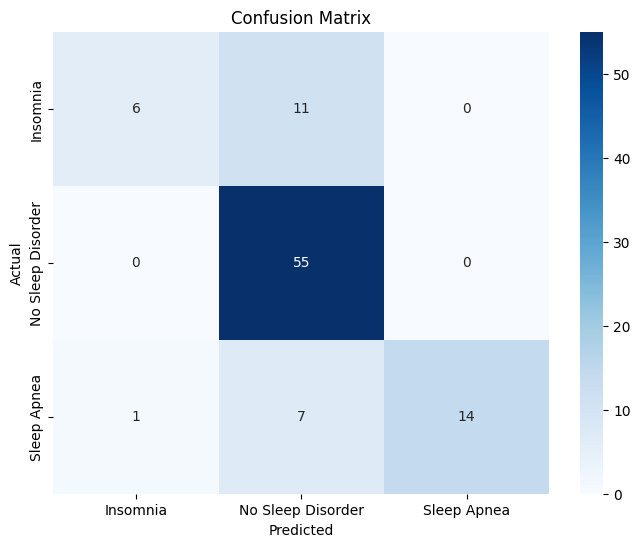

In [25]:
## Support Vector Machines - Navya
print("\nSupport Vector Machines\n")
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create and train the SVM classifier with RBF kernel
svm_model = SVC(kernel='rbf', C=1, gamma=0.5, random_state=42)
svm_model.fit(X_train, y_train)

# Predict the target values for the test data
y_pred = svm_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g',
            xticklabels= ["Insomnia", "No Sleep Disorder", "Sleep Apnea"],
            yticklabels= ["Insomnia", "No Sleep Disorder", "Sleep Apnea"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


K-Nearest Neighbors
Optimal K: 11 with Accuracy: 0.8893
Accuracy: 0.88

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.82      0.74        17
           1       0.96      0.96      0.96        55
           2       0.89      0.73      0.80        22

    accuracy                           0.88        94
   macro avg       0.84      0.84      0.83        94
weighted avg       0.89      0.88      0.88        94


Confusion Matrix:
[[14  1  2]
 [ 2 53  0]
 [ 5  1 16]]


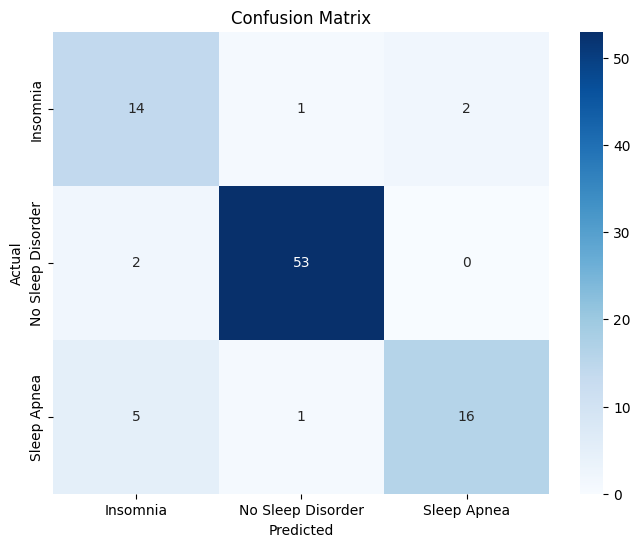


SMOTE Oversampling:
New Accuracy after SMOTE: 0.88

New Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.82      0.76        17
           1       0.96      0.96      0.96        55
           2       0.84      0.73      0.78        22

    accuracy                           0.88        94
   macro avg       0.84      0.84      0.83        94
weighted avg       0.89      0.88      0.88        94


New Confusion Matrix:
[[14  1  2]
 [ 1 53  1]
 [ 5  1 16]]


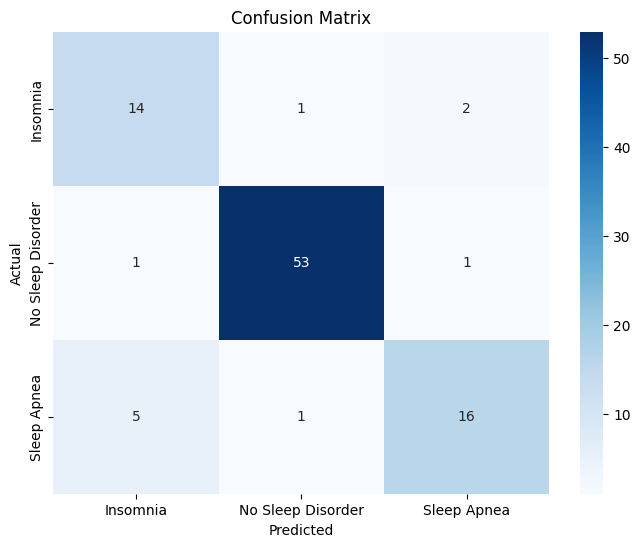


Feature Selection:
New Accuracy after Feature Selection: 0.89

New Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.88      0.79        17
           1       0.96      0.96      0.96        55
           2       0.89      0.73      0.80        22

    accuracy                           0.89        94
   macro avg       0.86      0.86      0.85        94
weighted avg       0.90      0.89      0.89        94


New Confusion Matrix:
[[15  1  1]
 [ 1 53  1]
 [ 5  1 16]]


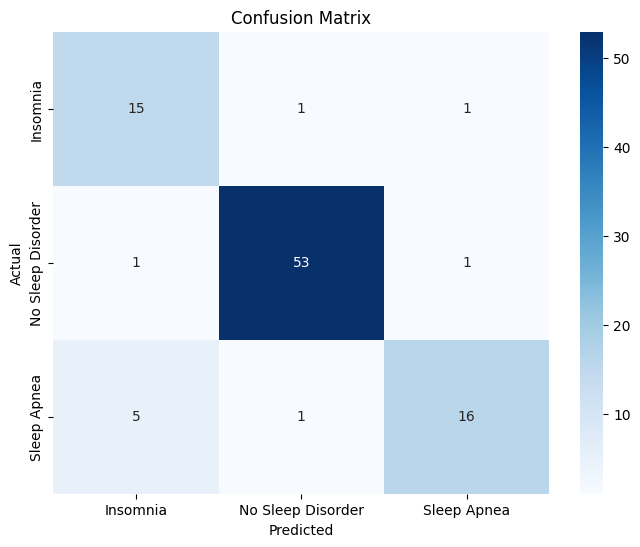

In [26]:
## K-Nearest Neighbors - Camila
from sklearn.model_selection import train_test_split,  cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Choosing k parameter
# Find the best K using cross-validation
best_k = 1
best_score = 0
k_values = list(range(9, 13))
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    score = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy').mean()
    scores.append(score)

    if score > best_score:
        best_score = score
        best_k = k

print(f"\nK-Nearest Neighbors\nOptimal K: {best_k} with Accuracy: {best_score:.4f}")

knn = KNeighborsClassifier(n_neighbors=best_k, weights='distance') # weighted knn
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test) # the prediction

# evaluating accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g',
            xticklabels= ["Insomnia", "No Sleep Disorder", "Sleep Apnea"],
            yticklabels= ["Insomnia", "No Sleep Disorder", "Sleep Apnea"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



# Oversampling (SMOTE)
# Apply SMOTE to balance the dataset
print("\nSMOTE Oversampling:")
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train model again
knn = KNeighborsClassifier(n_neighbors=best_k, weights='distance')
knn.fit(X_train_resampled, y_train_resampled)
y_pred = knn.predict(X_test)

# Evaluate again
accuracy = accuracy_score(y_test, y_pred)
print(f"New Accuracy after SMOTE: {accuracy:.2f}")
print("\nNew Classification Report:")
print(classification_report(y_test, y_pred))
print("\nNew Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g',
            xticklabels= ["Insomnia", "No Sleep Disorder", "Sleep Apnea"],
            yticklabels= ["Insomnia", "No Sleep Disorder", "Sleep Apnea"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Reduce noise by Feature Selection
print("\nFeature Selection:")
selector = SelectKBest(f_classif, k=5)  # Keep top 5 features
X_train_selected = selector.fit_transform(X_train_resampled, y_train_resampled)  # Apply to SMOTE data
X_test_selected = selector.transform(X_test)

# Train again
knn = KNeighborsClassifier(n_neighbors=best_k, weights='distance')
knn.fit(X_train_selected, y_train_resampled)
y_pred_selected = knn.predict(X_test_selected)

print(f"New Accuracy after Feature Selection: {accuracy_score(y_test, y_pred_selected):.2f}")
print("\nNew Classification Report:")
print(classification_report(y_test, y_pred_selected))
print("\nNew Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_selected))
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_selected)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g',
            xticklabels= ["Insomnia", "No Sleep Disorder", "Sleep Apnea"],
            yticklabels= ["Insomnia", "No Sleep Disorder", "Sleep Apnea"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# conclusion: try a different model that handles class separability better like random forest cuz class 2 is still mistakenly confused with class 0